In [1]:
from models import GANModelWrapper, Discriminator, Generator
from train import train, validate, save_checkpoint
from data_loader import load_cifar10_data
from torch.nn import MSELoss
from torch.optim import Adam
import torch
from torch.utils.tensorboard import SummaryWriter
from gan_criterion_optimizer import GANCriterion, GANOptimizer
from loggers import GAN_LOGGER
from metrics import FIDMetric


In [2]:
train_loader, val_loader, test_loader = load_cifar10_data()
# Print the total size (number of samples) of each dataset
print("Total number of training samples:", len(train_loader.dataset))
print("Total number of validation samples:", len(val_loader.dataset))
print("Total number of test samples:", len(test_loader.dataset))

Files already downloaded and verified
Files already downloaded and verified
Total number of training samples: 45000
Total number of validation samples: 5000
Total number of test samples: 10000


In [3]:
# Hyperparameters
epochs = 1000
learning_rate = 1e-5
log_interval = 100

generator = Generator()
discriminator = Discriminator()

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
metric = FIDMetric(device)

# Model, loss function, and optimizer
model = GANModelWrapper(generator, discriminator).to(device)  # Example model; replace with any model
criterion = GANCriterion()
optimizer = GANOptimizer(generator, discriminator,lr=learning_rate)
# TensorBoard writer
logger = GAN_LOGGER(SummaryWriter())

# Training loop
best_fid_score = float('inf')
for epoch in range(1, epochs + 1):
    train(model, train_loader, criterion, optimizer, device, epoch, logger, log_interval)
    val_loss, fid_score = validate(model, val_loader, criterion, device, epoch, logger,metric)
    
    # Save checkpoint if validation loss improves
    if fid_score < best_fid_score:
        print(f"Validation loss improved from {best_fid_score:.4f} to {fid_score:.4f}. Saving model...")
        best_fid_score = fid_score
        save_checkpoint(model)

/home/nazara/Data/UCU/GENAI/env/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/nazara/Data/UCU/GENAI/env/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Epoch 1 [Validation]:   9%|▉         | 7/79 [00:00<00:01, 44.67it/s]


Validation loss improved from inf to 614.3230. Saving model...


Epoch 9 [Validation]:   9%|▉         | 7/79 [00:00<00:01, 48.36it/s]


Validation loss improved from 614.3230 to 594.6996. Saving model...


Epoch 10 [Validation]:   9%|▉         | 7/79 [00:00<00:01, 45.43it/s]


Validation loss improved from 594.6996 to 561.9698. Saving model...


Epoch 11 [Validation]:   9%|▉         | 7/79 [00:00<00:01, 46.94it/s]


Validation loss improved from 561.9698 to 517.3387. Saving model...


Epoch 12 [Validation]:   9%|▉         | 7/79 [00:00<00:01, 46.82it/s]


Validation loss improved from 517.3387 to 516.2320. Saving model...


Epoch 14 [Validation]:   9%|▉         | 7/79 [00:00<00:01, 45.91it/s]


Validation loss improved from 516.2320 to 506.4333. Saving model...


Epoch 17 [Validation]:   9%|▉         | 7/79 [00:00<00:01, 46.51it/s]


Validation loss improved from 506.4333 to 479.2458. Saving model...


Epoch 18 [Validation]:   9%|▉         | 7/79 [00:00<00:01, 45.17it/s]


Validation loss improved from 479.2458 to 474.8386. Saving model...


Epoch 19 [Validation]:   9%|▉         | 7/79 [00:00<00:01, 44.85it/s]


Validation loss improved from 474.8386 to 455.9089. Saving model...


Epoch 22 [Validation]:   9%|▉         | 7/79 [00:00<00:01, 46.81it/s]


Validation loss improved from 455.9089 to 435.2881. Saving model...


Epoch 23 [Validation]:   9%|▉         | 7/79 [00:00<00:01, 47.13it/s]


Validation loss improved from 435.2881 to 418.6980. Saving model...


Epoch 25 [Validation]:   9%|▉         | 7/79 [00:00<00:01, 43.91it/s]


Validation loss improved from 418.6980 to 393.3754. Saving model...


Epoch 27 [Validation]:   9%|▉         | 7/79 [00:00<00:01, 43.99it/s]


Validation loss improved from 393.3754 to 389.7952. Saving model...


Epoch 29 [Validation]:   9%|▉         | 7/79 [00:00<00:01, 47.17it/s]


Validation loss improved from 389.7952 to 333.6779. Saving model...


Epoch 36 [Validation]:   9%|▉         | 7/79 [00:00<00:01, 48.14it/s]


Validation loss improved from 333.6779 to 330.0964. Saving model...


Epoch 38 [Validation]:   9%|▉         | 7/79 [00:00<00:01, 48.89it/s]


Validation loss improved from 330.0964 to 326.0216. Saving model...


Epoch 42 [Validation]:   9%|▉         | 7/79 [00:00<00:01, 46.20it/s]


Validation loss improved from 326.0216 to 314.0091. Saving model...


Epoch 48 [Validation]:   9%|▉         | 7/79 [00:00<00:01, 47.77it/s]


Validation loss improved from 314.0091 to 272.9424. Saving model...


Epoch 52 [Validation]:   9%|▉         | 7/79 [00:00<00:01, 45.59it/s]


Validation loss improved from 272.9424 to 271.9594. Saving model...


Epoch 54 [Validation]:   9%|▉         | 7/79 [00:00<00:01, 47.88it/s]


Validation loss improved from 271.9594 to 259.4442. Saving model...


Epoch 61 [Validation]:   9%|▉         | 7/79 [00:00<00:01, 49.51it/s]


Validation loss improved from 259.4442 to 258.1718. Saving model...


Epoch 65 [Validation]:   9%|▉         | 7/79 [00:00<00:01, 44.67it/s]


Validation loss improved from 258.1718 to 250.3817. Saving model...


Epoch 68 [Validation]:   9%|▉         | 7/79 [00:00<00:01, 49.14it/s]


Validation loss improved from 250.3817 to 248.8837. Saving model...


Epoch 71 [Validation]:   9%|▉         | 7/79 [00:00<00:01, 48.10it/s]


Validation loss improved from 248.8837 to 246.7298. Saving model...


Epoch 73 [Validation]:   9%|▉         | 7/79 [00:00<00:01, 46.20it/s]


Validation loss improved from 246.7298 to 235.5552. Saving model...


Epoch 86 [Validation]:   9%|▉         | 7/79 [00:00<00:01, 46.62it/s]


Validation loss improved from 235.5552 to 231.2591. Saving model...


Epoch 89 [Validation]:   9%|▉         | 7/79 [00:00<00:01, 47.66it/s]


Validation loss improved from 231.2591 to 225.1437. Saving model...


Epoch 91 [Validation]:   9%|▉         | 7/79 [00:00<00:01, 48.37it/s]


Validation loss improved from 225.1437 to 210.7185. Saving model...


Epoch 96 [Validation]:   9%|▉         | 7/79 [00:00<00:01, 46.83it/s]


Validation loss improved from 210.7185 to 208.6589. Saving model...


Epoch 101 [Validation]:   9%|▉         | 7/79 [00:00<00:01, 45.75it/s]


Validation loss improved from 208.6589 to 191.0569. Saving model...


Epoch 227 [Train]:  94%|█████████▍| 660/704 [00:17<00:01, 36.94it/s]


KeyboardInterrupt: 

In [3]:
# First cell - Initialize model and load checkpoint
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
best_checkpoint_path = "saved_model/best_model.pth"
generator = Generator()
discriminator = Discriminator()
model = GANModelWrapper(generator,discriminator).to(device)
checkpoint = torch.load(best_checkpoint_path, map_location=device)
model.load_state_dict(checkpoint)
model.eval();

/tmp/ipykernel_888769/2858255769.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(best_checkpoint_path, map_location=device)


In [4]:
# Second cell - Get test images
test_images = []
for batch, _ in test_loader:
    test_images.append(batch)
    if len(torch.cat(test_images)) >= 2000:
        break
test_images = torch.cat(test_images)[:2000]

In [21]:
# Third cell - Generate images
generated_images = []
batch_size = 64

with torch.no_grad():
    for i in range(0, 2000, batch_size):
        curr_batch_size = min(batch_size, 2000 - i)
        gen_batch = model.generate(curr_batch_size, device=device)
        generated_images.append(gen_batch)

generated_images = torch.cat(generated_images)

In [22]:
# Fourth cell - Compute FID
metric = FIDMetric(device)
fid_score = metric(test_images, generated_images)
print(f"FID Score: {fid_score:.2f}")

FID Score: 156.61


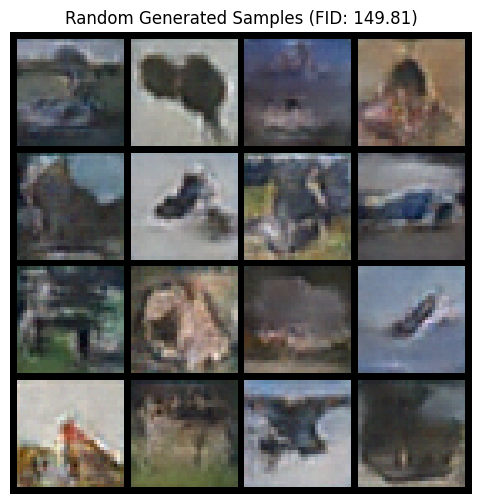

In [14]:
# Fifth cell - Visualize 16 random samples
import random
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

# Get 16 random indices
indices = random.sample(range(len(generated_images)), 16)
vis_samples = generated_images[indices]

# Create and display grid
grid = make_grid(vis_samples, nrow=4, padding=2, normalize=True)
plt.figure(figsize=(6, 6))
plt.imshow(grid.cpu().permute(1, 2, 0).numpy())
plt.axis('off')
plt.title(f'Random Generated Samples (FID: {fid_score:.2f})')
plt.show()